### Cory Melendez
### Neural Network Project
### Github Repository: https://github.com/cmelende/BankChurnNeuralNetwrok.git

In [285]:
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import tensorflow as tf
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import ThresholdedReLU
from sklearn.model_selection import train_test_split


In [286]:
tf.__version__

'2.3.1'

In [287]:
# setup
show_graphs = True
row_number_column = "RowNumber"
customer_id_column = "CustomerId"
surname_column = "Surname"
drop_columns = [row_number_column, customer_id_column, surname_column]
all_columns = [row_number_column, customer_id_column,surname_column,"CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"]


### 1. Read the dataset


In [288]:
df = pd.read_csv("bank.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2. Drop the columns which are unique for all users like IDs (5 points)

If we knew a little more about the domain, I would want to see if we should not drop the surname columns. The surnames could be valuable if we knew if they lived in the same houeshold or were close relatives but some surnames are common and there can be little relationship between people, and therefore not much information can be derived from knowing the surname alone. I am dropping it for now.

In [289]:
df_no_id_columns = df.drop(drop_columns, axis=1)
df_no_id_columns.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. Distinguish the features and target variable (5 points)

* The features are "CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited"

* The target variable column is "Exited"

In [290]:
feature_columns = ["CreditScore","Geography","Gender","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]
target_column = "Exited"

features_df = df_no_id_columns.copy()[feature_columns]
target_df = df_no_id_columns.copy()[target_column]

features_df_with_dummy_vars = pd.get_dummies(features_df)

X = features_df_with_dummy_vars.copy()
Y = target_df.copy()


### 4. Divide the data set into training and test sets (5 points)

In [291]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [292]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2228,644,37,8,0.00,2,1,0,20968.88,1,0,0,1,0
5910,481,39,6,0.00,1,1,1,24677.54,1,0,0,1,0
1950,680,37,10,123806.28,1,1,0,81776.84,1,0,0,1,0
2119,690,29,5,0.00,2,1,0,108577.97,1,0,0,0,1
5947,656,45,7,145933.27,1,1,1,199392.14,1,0,0,1,0


### 5. Normalize the train and test data (10 points)


In [293]:
normalized_columns = ["Balance", "EstimatedSalary", "CreditScore","Age","Tenure", "NumOfProducts"]

def normalize_df(df, columns):
    result = df.copy()
    for feature_name in columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [294]:
X_test_normalized = normalize_df(X_test, normalized_columns)
X_train_normalized = normalize_df(X_train, normalized_columns)

In [295]:
X_test_normalized.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9953,0.400,0.391892,0.2,0.000000,0.333333,1,1,0.485275,1,0,0,0,1
3850,0.660,0.216216,0.3,0.646825,0.000000,1,0,0.332604,1,0,0,0,1
4962,0.362,0.324324,0.2,0.000000,0.333333,0,1,0.452673,1,0,0,1,0
3886,0.720,0.216216,0.8,0.667320,0.333333,0,1,0.007751,0,1,0,0,1
5437,0.386,0.162162,0.6,0.331694,0.000000,1,1,0.883490,0,1,0,0,1


In [296]:
X_train_normalized.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2228,0.588,0.256757,0.8,0.000000,0.333333,1,0,0.104449,1,0,0,1,0
5910,0.262,0.283784,0.6,0.000000,0.000000,1,1,0.123003,1,0,0,1,0
1950,0.660,0.256757,1.0,0.493452,0.000000,1,0,0.408673,1,0,0,1,0
2119,0.680,0.148649,0.5,0.000000,0.333333,1,0,0.542759,1,0,0,0,1
5947,0.612,0.364865,0.7,0.581644,0.000000,1,1,0.997105,1,0,0,1,0


### 6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20)
### NOTE: The commented out code here is basically the order i tried different models with thoughts on why i changed it.

In [297]:

# first i made the mistake of inputting too many input layers. figured that our example in class where we had 784 columsn and 784 neurons in the input layer, that i should do something similar layer
# model.add(Dense(784,activation='relu'))
# model.add(Dense(100, activation ='relu'))
# model.add(Dense(1,activation='softmax'))

# Next i tried 13 neurons in the input layer but it changed very little
# also - after some research found this: https://www.heatonresearch.com/2017/06/01/hidden-layers.html which stated
# The number of hidden neurons should be between the size of the input layer and the size of the output layer, The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer,The number of hidden neurons should be less than twice the size of the input layer.
# So i chose 10 since (13 * (2/3)) + 1 = 9.6666667
# model.add(Dense(13,activation='relu'))
# model.add(Dense(100, activation ='relu'))
# model.add(Dense(1,activation='softmax'))

# Wanted to see what more hidden layers would do, which didnt increase my accuracy, also changed the output layer's activiation function to sigmoid after research
# model = Sequential()
# model.add(Dense(13,activation='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


# this increased my accuracy by a lot,to .791 by changing the loss function to binary_crossentropy, i managed to more than double my accuracy
# model = Sequential()
# model.add(Dense(13,activation='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

#accuracy didnt change here, also tried a lot more hidden layers without change
# model = Sequential()
# model.add(Dense(13,activation='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# accuracy was .791, a small decrease. Wanted to see if using an input layer would change much.
# model = Sequential()
# model.add(Input(shape=(13,)))
# model.add(Dense(10, activation ='relu'))
# model.add(Dense(1,activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# accuracy went down .01, which is curious, the lack of a hidden layer seemed to not affect it. Which also is reinforced by what i tried above
# model = Sequential()
# model.add(Dense(13,activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# accuracy went up, got .794 to .802 on different runs
# model = Sequential()
# model.add(Dense(13,activation='selu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# adding more hidden layers increased the accuracy on average, got as high as .815
# model = Sequential()
# model.add(Dense(13,activation='selu'))
# model.add(Dense(10, activation ='selu'))
# model.add(Dense(10, activation ='selu'))
# model.add(Dense(10, activation ='selu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## BEST!!!
## accuarcy was .839 at best, but also dropped to .790 on some runs. Also I can tell that efficiency to train the model is starting to decrease
model = Sequential()
model.add(Dense(13,activation='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(10, activation ='selu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [298]:
model.fit(X_train_normalized, y_train, epochs=10, batch_size=256, verbose=1) 

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

28/28 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7964
Epoch 2/10
28/28 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7984
Epoch 3/10
28/28 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.8000
Epoch 4/10
28/28 [==============================] - 0s 1ms/step - loss: 0.4607 - accuracy: 0.8037
Epoch 5/10
28/28 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.8056
Epoch 6/10
28/28 [

### 7. Predict the results using 0.5 as a threshold (10 points)

In [299]:
loss, acc = model.evaluate(X_test_normalized, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.831
Loss: 0.413


In [300]:
y_predict = model.predict(X_test_normalized)

In [301]:
y_predict
lst = []
y_pred_values = []
for val in y_predict:
    isTrue = 0
    if(val > .5):
        isTrue = 1
    else:
        isTrue = 0
    lst.append(isTrue)
    # y_pred_values.append(isTrue)
    y_pred_values = pd.Series(lst) 




### 8. Print the Accuracy score and confusion matrix (5 points)

In [302]:
print('Accuracy: %.3f'  % acc)
cm = metrics.confusion_matrix(y_test,y_pred_values, labels=[1,0])
print(cm)

Accuracy: 0.831
[[ 202  425]
 [  82 2291]]


<AxesSubplot:>

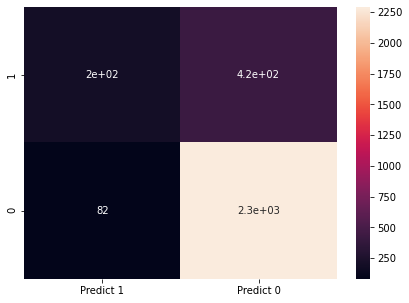

In [303]:
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                    columns = [i for i in ["Predict 1","Predict 0"]])
                    
TP = df_cm['Predict 1'][0]
FP = df_cm['Predict 1'][1]
FN = df_cm['Predict 0'][0]
TN = df_cm['Predict 0'][1]   

accuracy = (TP + TN)/(TP+TN+FP+FN)
recall = (TP)/(TP+FN)
precision = (TP)/(TP+FP)

plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [304]:
print("Accuracy:", accuracy)
print("Precision:", recall)                 
print("Recall:", precision)
print("F1 Score: ", (precision * recall)/(precision + recall))

Accuracy: 0.831
Precision: 0.32216905901116427
Recall: 0.7112676056338029
F1 Score:  0.2217343578485181
